Problem:Time Series Analysis of Rose Wine Sales
For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

Data set for the Problem: Sparkling.csv and Rose.csv

Please do perform the following questions on each of these two data sets separately.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Loading packages & basic +dates

In [2]:
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline
# Statistics
from statsmodels.distributions.empirical_distribution import ECDF
# Time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Read the files ,by providing the index_col as Year-Month'

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Smita/Google Drive/Great Learning/Greatlearning_PGPDSBA (Rivision)/Time series/times eries arimax sarimax  end to end case study /Time series project_wine sales/Rose.csv',parse_dates = True, index_col = 0)

First Top and Bottom five Rows of data set

In [4]:
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [5]:
df.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


Now, we have our data ready for the Time Series Analysis.

In [6]:
df.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-10-01', '1994-11-01', '1994-12-01', '1995-01-01',
               '1995-02-01', '1995-03-01', '1995-04-01', '1995-05-01',
               '1995-06-01', '1995-07-01'],
              dtype='datetime64[ns]', name='YearMonth', length=187, freq=None)

Date-Time index:187 entries ,1980-01-01 to 1995-07-01

In [7]:
print("The number of rows: ",df.shape[0], "\n""The number of columns: ",df.shape[1])

The number of rows:  187 
The number of columns:  1


Data has 187 rows and 1 features

#Lets check the data type of different variables present in dataset.

In [8]:
df.dtypes

Rose    float64
dtype: object

In [9]:
print('We have around',187/12,'year of data.')

We have around 15.583333333333334 year of data.


#Missing value check

In [10]:
df.isnull().sum()

Rose    2
dtype: int64

There are 187 data points ,with 2 missing values and 'Rose' is variables is of integer datatype.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


#Plot the Time Series to understand the behaviour of the data. Time series plot and stationarity Let us plot the time series for an initial analysis.

#Plot the Time Series to understand the behaviour of the data

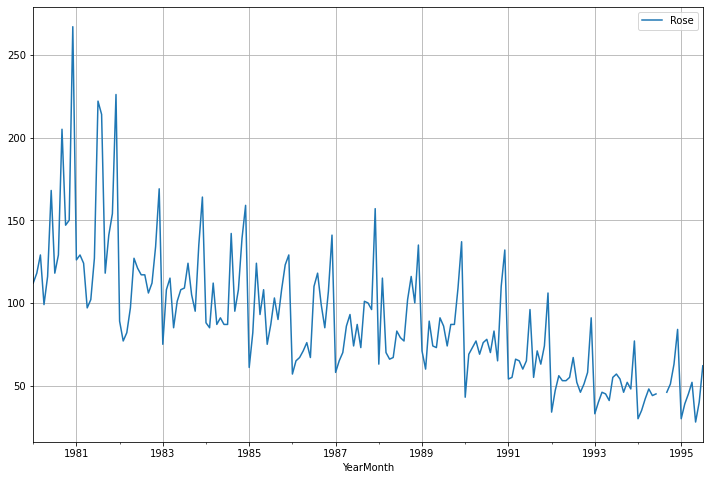

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
df.plot()
plt.grid();

Suppose we predict the Rose for the next few months ,we will look t the past sales values and try to guage and extract a pattern . Here ,we observe a pattern within each year indicating a seasonal effect .``Such observations will help us in predicting future values . Note:We have used only one variable ,Rose (Rose sales of past 15 years ). Hence ,this is the univariate Time series Analysis /Forecasting . Strong Downwrad Trend is present and Seasonal effect might be present.These can be inferred from the plot .

There seems to be no trend but seasonality can be seen here.

# Imputing the missing value using Interpolate function
Using interpolate function with Linear method to impute two missing observation in Rose data

In [13]:
  df_imputed= df.interpolate()
  print(df_imputed)

             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
...           ...
1995-03-01   45.0
1995-04-01   52.0
1995-05-01   28.0
1995-06-01   40.0
1995-07-01   62.0

[187 rows x 1 columns]


Plot of TS post missing value imputation

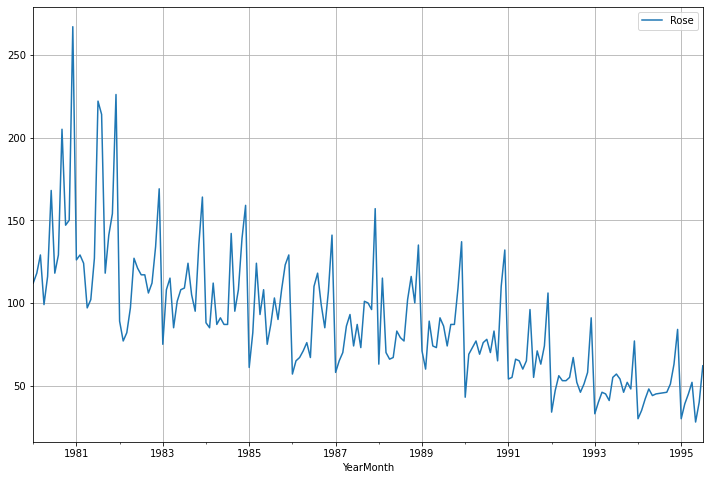

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
df_imputed.plot()
plt.grid();

#Check the basic measures of descriptive statistics of the Time Series

In [15]:
round(df_imputed.describe(),3)

,Rose
count,187.000
mean,89.914
std,39.238
min,28.000
25%,62.500
50%,85.000
75%,111.000
max,267.000


Now mean value is 89.91 ,median is 85 and the range is 239

#Exploratory Data Analysis
Univariate Time Series Analysis
A univariate time series is a series with single-time stamped variable at time t . Here the dataset belongs to the Sparkling Wine sales from the January of 1980 to July of 1995 .Here Rose wine is time -dependent variable. The series is a monthly series ,wherein for each month between Jan -1980 and July -1995 a datapoint is recorded.

#Plot ECDF: Empirical Cumulative Distribution Function

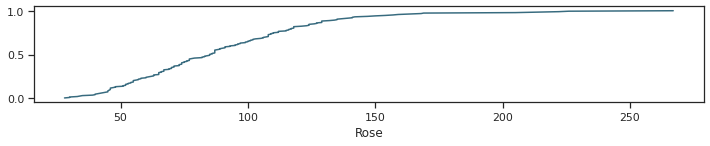

In [16]:
#ECDF - Adds up the number of observations that are there for a certain value.
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))
plt.subplot(312)
cdf = ECDF(df_imputed['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Rose');

An ECDF plot is an estimator of the Cumulative Distribution Function .The ECDF essentially allows you to plot a feature of data in order from least to greatest and see the whole feature as if it is distributedacross the data set .The dataranges from 28 to 276.

##Box plot per year wise

Plot a boxplot to understand the spread of sales across different years and within different months across years. Yearly Boxplot

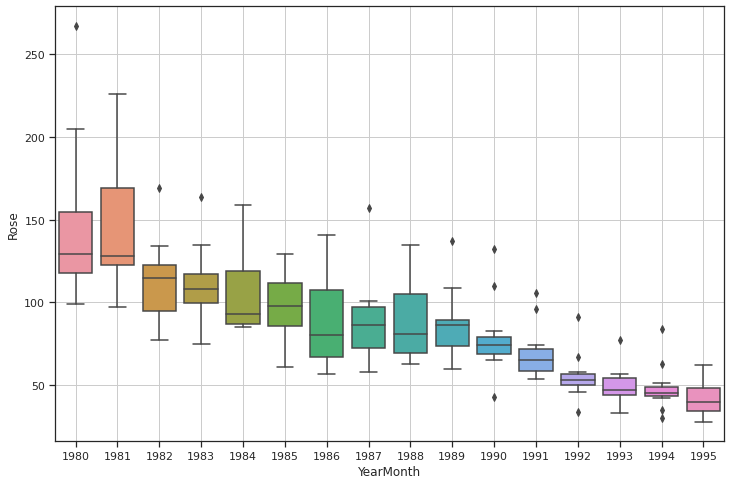

In [17]:
sns.boxplot(x = df_imputed.index.year,y = df_imputed['Rose'])
plt.grid();

Across the year ,there are not much noticeable difference,though there are few high ranges in initial years .Also the last year is showing less sale due to the fact that the data is recorded for 7 out of 12 months in year of 1995

##Boxplot per month wise(Monthly Boxplot)

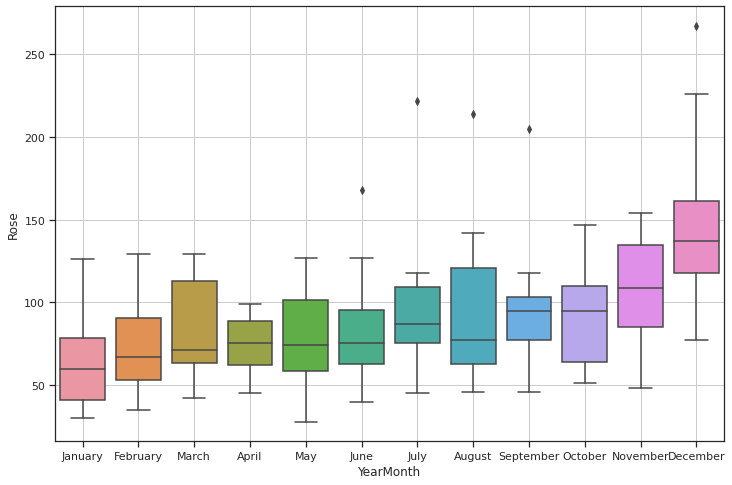

In [18]:
sns.boxplot(x = df_imputed.index.month_name(),y = df_imputed['Rose'])
plt.grid();

There is a maximum sale in month of December followed by November & October.These fluctuations can be attributed to the months being the holiday month or months .June shows the minimum sale . Do remember that there is one less observation for few months in the year 1995. We can a see a seaonality effect with a cycle of 12 months.

There is a clear distinction of 'Rose wines sales' within different months spread across various years.
Inferences: The Rose wine sales have been increasing in the winter season every year. December are the peak month for Rose Wine sales and the variance and the mean value for those months are also much higher than any of the other months. We can see a seasonal effect with a cycle of 12 months.

##Plot a graph of monthly sales across years

Year -Month sales table

In [19]:
monthly_sales_across_years = pd.pivot_table(df_imputed, values = 'Rose', columns = df_imputed.index.month, index = df_imputed.index.year)
monthly_sales_across_years

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


Post July 1995 there is no data points for 1995 year .

#Plot the Time series along with the mean and median of the Time series in the graph to get an understanding of the fluctuation of the data from these two measures of central tendency.

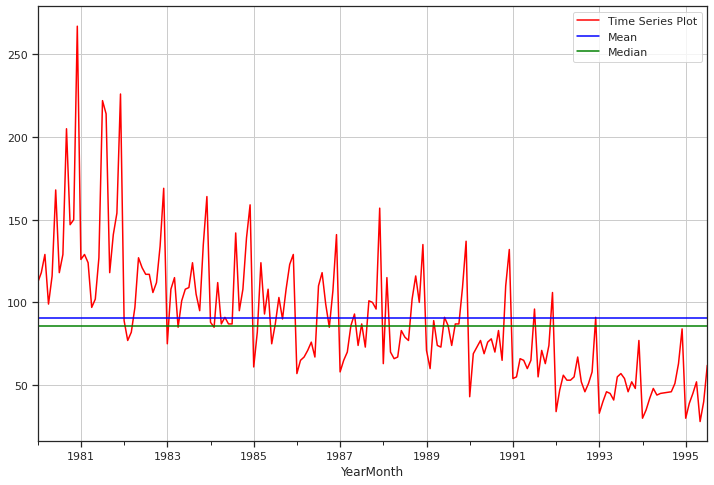

In [20]:
df_imputed.plot(color='Red')
plt.axhline(df['Rose'].mean(),color='Blue')
plt.axhline(df['Rose'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

# Yearly sale comparision of Rose wine using barplot

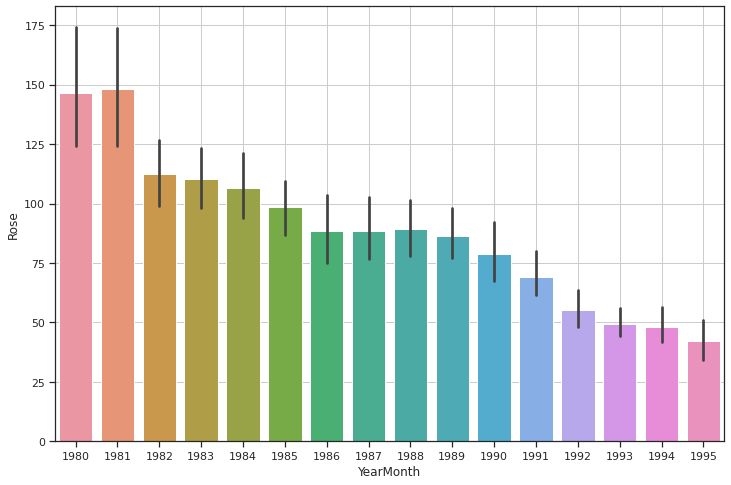

In [21]:
sns.barplot(df_imputed.index.year,df_imputed.Rose,data=df)
plt.grid();

#Monthly Line  plot for comparision between each month distribution

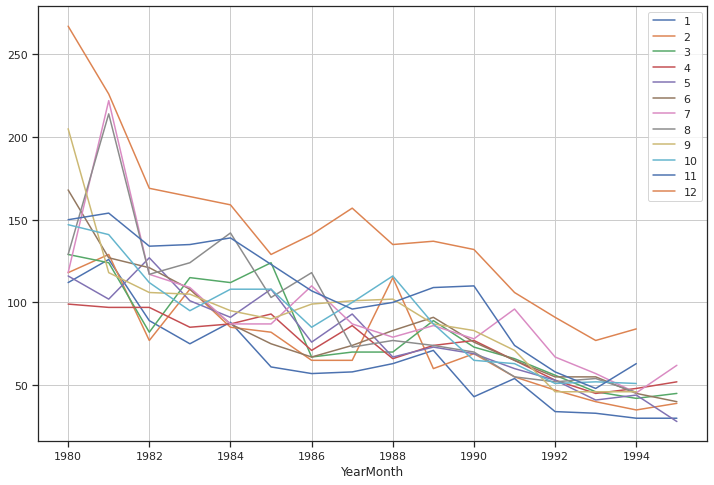

In [22]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

From the graph also, we can conclude that December has the highest sales across years.

As previously seen Month of December is outperforming for almost everyyear and it is another indicator that there is high out of seasonal sale in Oct-Dec.

#Plot the average Rose Sales per month and the month on month percentage change of Rose Sales

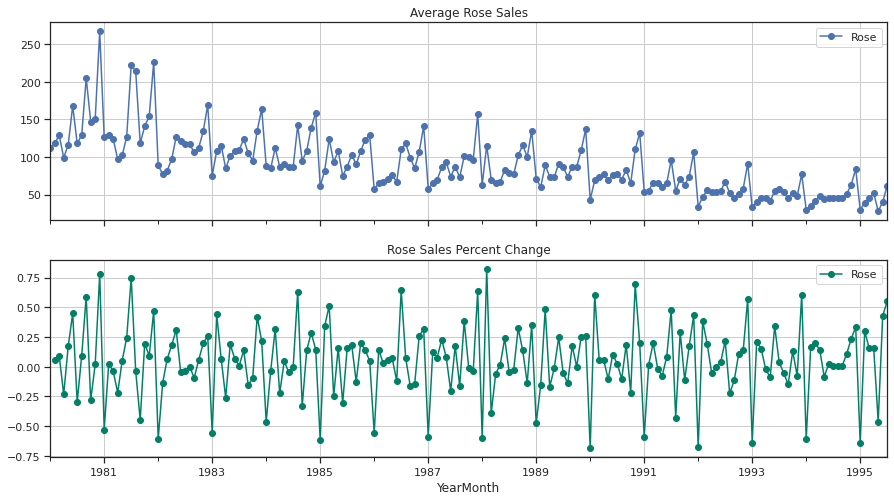

In [23]:
# group by date and get average RetailSales, and precent change
average    = df_imputed.groupby(df.index)["Rose"].mean()
pct_change = df_imputed.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Sales Percent Change",grid=True)

The above two graphs tells us the Average 'Rose Sales' and the Percentage change of 'Rose Sales' with respect to the time.It shows lot of seasonal variation every year .

## Time Series Decomposition

# Additive Decomposition (Rose Wine)

An additive model suggest that the components are added together . An additive model is linear where the changes over time are consistently added by the same amount .The seasonal correction is added with the Trend . A linear seasonality has the same frequency (width of the cycles) and amplitude(heightof the cycles).

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

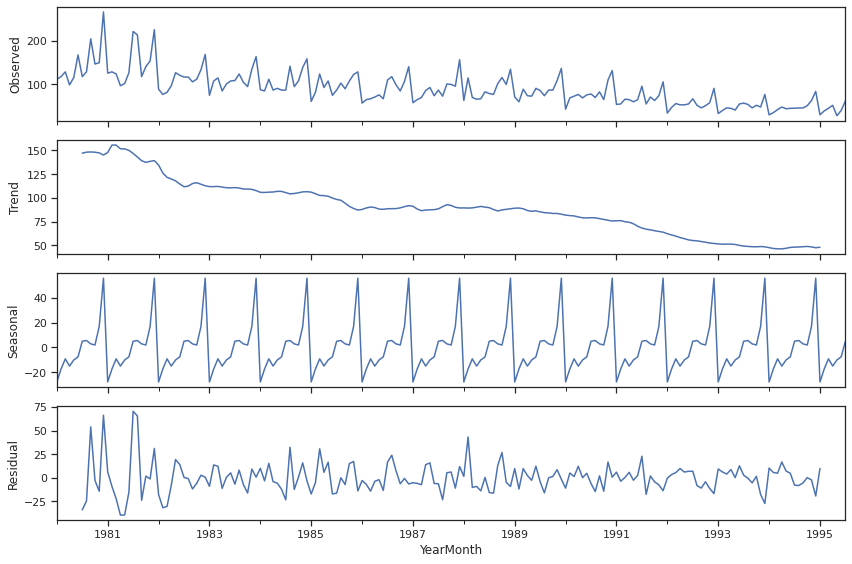

In [25]:
decomposition = seasonal_decompose(df_imputed['Rose'],model='additive')
decomposition.plot();

In [26]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: Rose, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
1980-11-01    16.846908
1980-12-01    55.713575
Name: Rose, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
1980-11-01   -14.263575
1980-12-01    66.161425
Nam

##Multiplicative Decomposition-(Rose Wine)

A multiplicative model suggest that the components are multiplied together . A multiplicative model is non-linear The seasonal correction is multiplied with the trend. A non-linear seasonality has an increasing or decreasing frequency (widh of cycles ) and or amplitude (height of the cycles) over time.

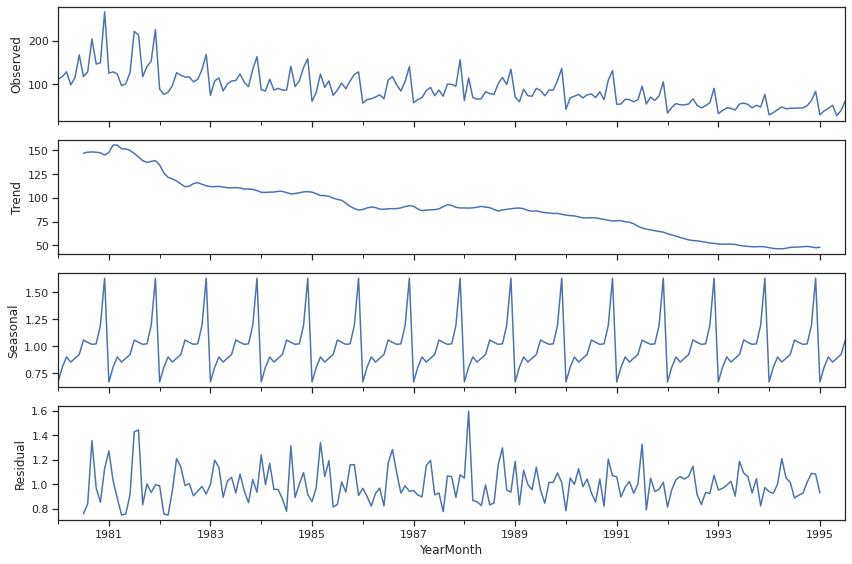

In [27]:
decomposition = seasonal_decompose(df_imputed['Rose'],model='multiplicative',freq=12)
decomposition.plot();
# For the multiplicative series, we see that a lot of residuals are located around 1.

In [28]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: Rose, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670111
1980-02-01    0.806163
1980-03-01    0.901164
1980-04-01    0.854024
1980-05-01    0.889415
1980-06-01    0.923985
1980-07-01    1.058038
1980-08-01    1.035881
1980-09-01    1.017648
1980-10-01    1.022573
1980-11-01    1.192349
1980-12-01    1.628646
Name: Rose, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758258
1980-08-01    0.840720
1980-09-01    1.357674
1980-10-01    0.970771
1980-11-01    0.853378
1980-12-01    1.129646
Name: Rose, dtype: float64 

Closer look at the trend in data set
There is an upward trend in the initial half which seems to be reach at a peak and then move in downward position .This will help in the forecast as in the most recent time it seems to have downward trend.

Inference:Hence we can say sparking wine time series show additive decomposition as errors patterns are almost similar to additive decomposition .

## Train -Test Split 

Split the data into train and test set .
Build different time sewroies models on train dataset and test data set Compare the models performances

The test data begins 1991 onwards .
Anything before 1991 can considered in the training data so long they are contigous .

In [29]:
train    =   df_imputed[0:int(len(df_imputed)*0.71)] 
test     =   df_imputed[int(len(df_imputed)*0.71):]

In [30]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


First few rows of Training Data & Testing data 

In [31]:
from IPython.display import display

In [32]:
print('First few rows of Training Data')
display(train.head())
# print('Last few rows of Training Data')
# display(train.tail())
print('First few rows of Test Data')
display(test.head())
# print('Last few rows of Test Data')
# display(test.tail())

First few rows of Training Data


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


First few rows of Test Data


,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


##Joint point for train and test data set

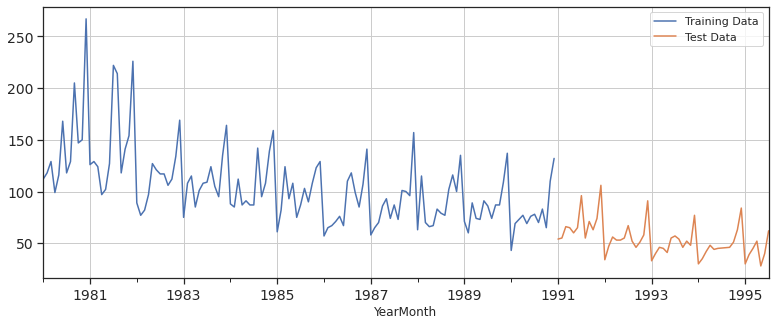

In [33]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years

#Building different models and comparing the accuracy metrics

#Model 1: Build a Linear Regression using the Time Stamped order of Rose wine sales

Model 1: Linear Regression

For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.
Here time is independent variable and Rose is dependent variable .

In [34]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)


Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


Back up of orginal data 

In [35]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()


Adding new column train time and test time to data.

In [36]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



Now that our training and test data has been modified, let us go ahead use 𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛 to build the model on the training data and test the model on the test data.

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)
# [[]] is used to allign newly created column as dataframe object(format allignment) .


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Model 1 Plot-Linear regression

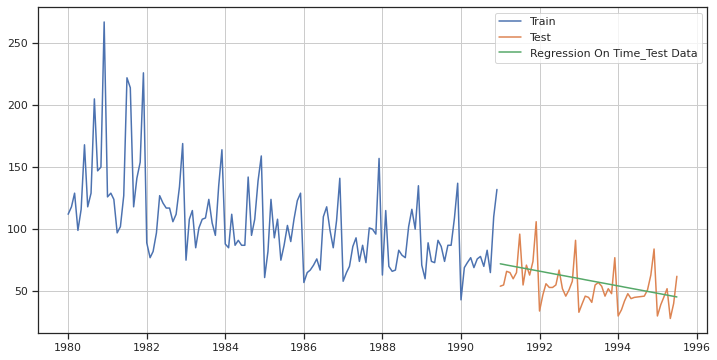

In [40]:
test_predictions_model1= lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
plt.figure(figsize=(12,6))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#Defining the accuracy metrics

In [41]:
from sklearn import metrics

## Test Data - RMSE

In [42]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.269


In [43]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,15.268955


For Regression Model the forecast on Test Data ,RMSE is 15.2

#Model 2-Naive Model

For this particular Naive approach, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tommorow and since the prediction of tommorow is same as today .So the prediction for day after tomorrow is also today .

In [44]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [45]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

Model 2 Plot-Naive Approach

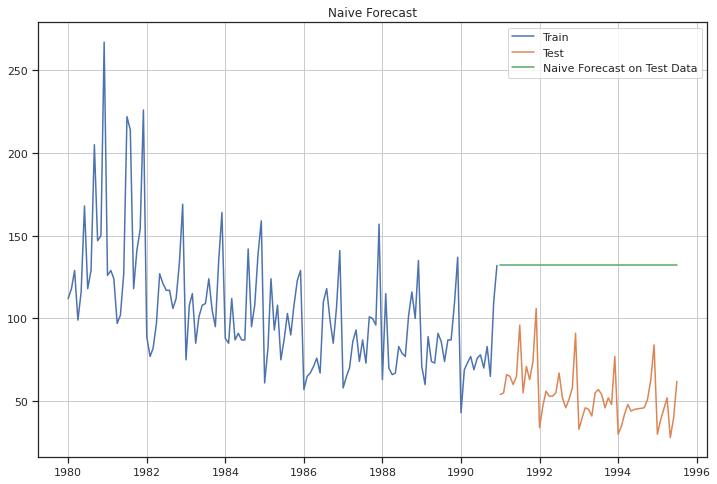

In [46]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#Model Evaluation -Naive Approach

In [47]:
## Test Data - RMSE
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719


In [48]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773


Model 2 Evaluation -Naive For Naive Model forcast on Test Data :RMSE is 79.7. We can infer from the plot and RMSE values that the Linear Regression and naive Method on time model might not be suited for data set with high variability .

#Model 3: Simple Average

For this particular simple average method ,we will forecast by using the average of the training data .

In [49]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [50]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


Model 3 Plot -Simple Average

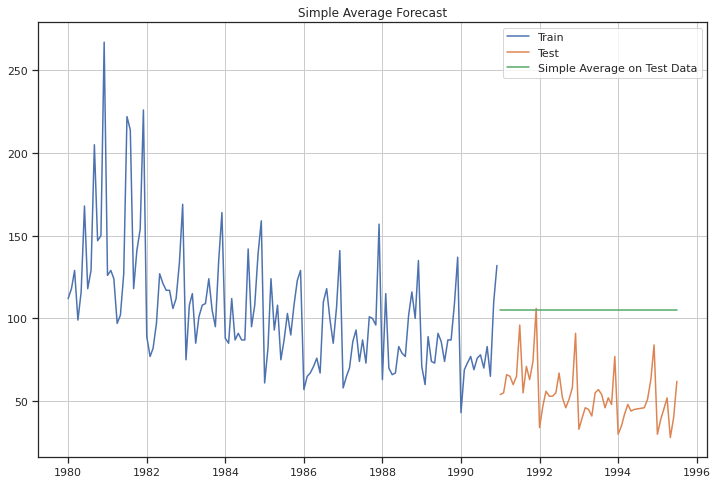

In [51]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

Model 3 Evaluation-Simple Average

In [52]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [53]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570


#Method 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here. For Moving Average, we are going to average over the entire data

In [54]:
MovingAverage = df_imputed.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Trailing moving averages

In [55]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


#Model 4 Plot -Moving Average

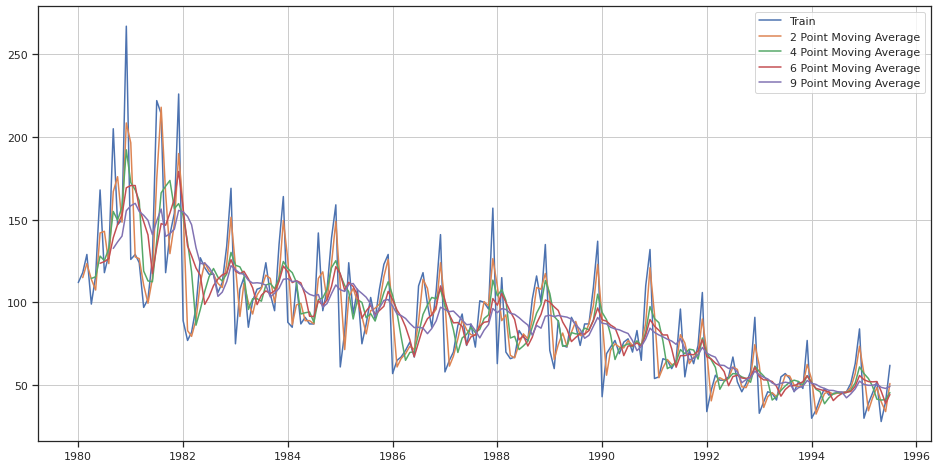

In [56]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.
Here 2 point moving average is replicatig the test data .

In [57]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

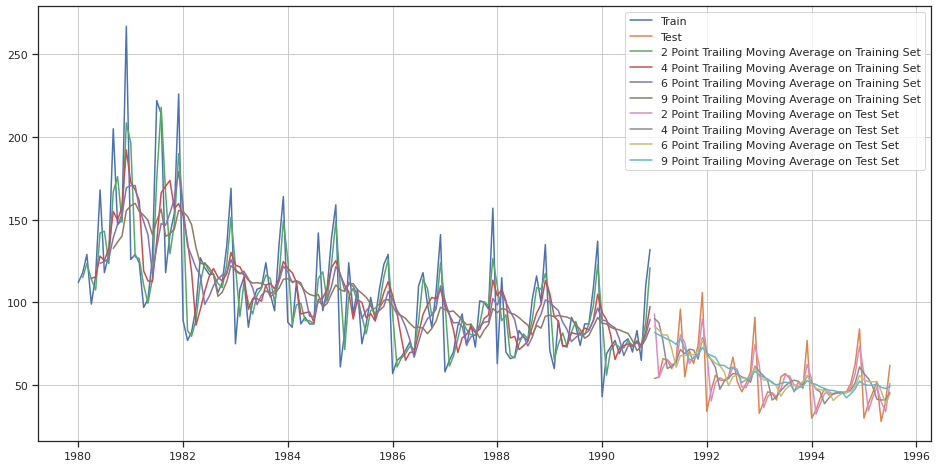

In [58]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

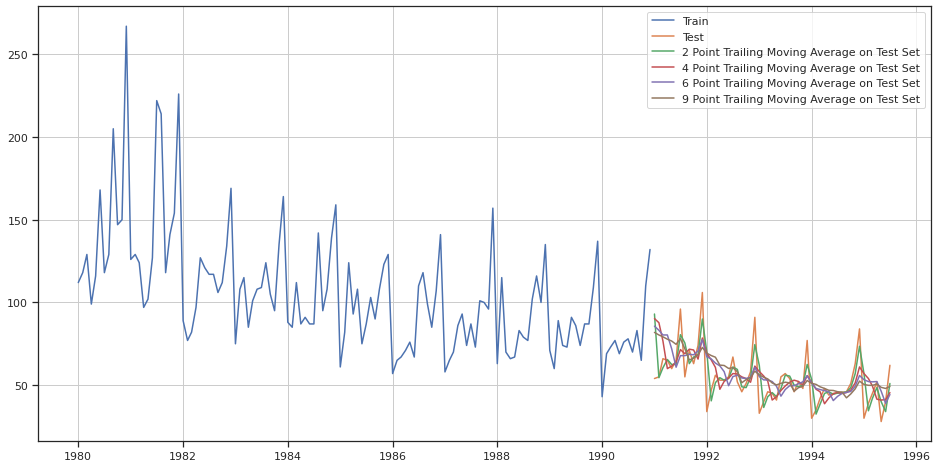

In [59]:
## Plotting on both the Training and Test data
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();
# Visualizing separately for test set 

In [60]:
## Test Data - RMSE  --> 2 point Trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data, RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))
# Out of all 2 point moving average seems better. 

For 2 point Moving Average Model forecast on the Training Data, RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.451
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.566
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.728


#Model 4 Evaluation-Moving Average

In [61]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630


Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots

# Plot all threes Simple average ,Naive approach and moving average model together and compare the time series plots.

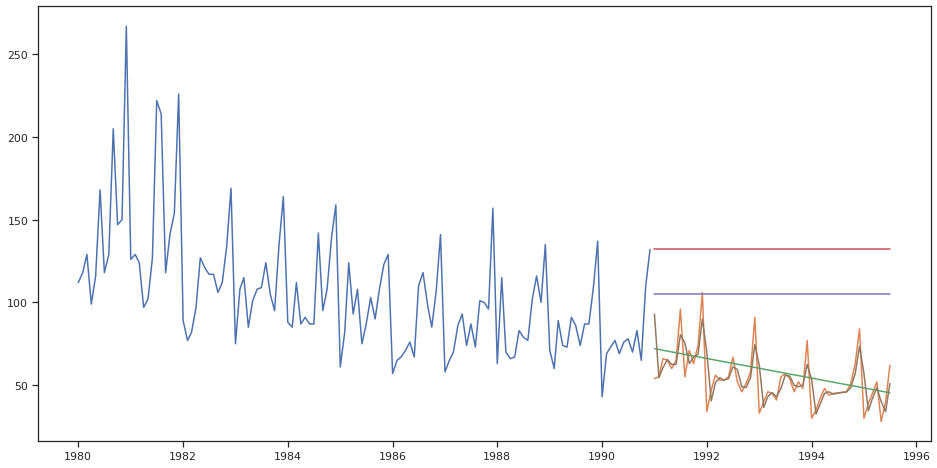

In [62]:
## Plotting on both Training and Test data
plt.figure(figsize=(16,8))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

Build a Simple Exponential Smoothing model by using the parameter 'optimise=True' within the '.fit()' function. Then,evaluate the same model on the test set using RMSE.

## Exponential Models

#Model 5:Simple Exponential Model 

In [63]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [64]:
SES_train = train.copy()
SES_test = test.copy()

In [65]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [66]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

## Model 5 Auto Fit Parameters

In [67]:
model_SES_autofit.params

{'damping_slope': nan,
 'initial_level': 134.38712015111975,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.09875003987520162,
 'smoothing_seasonal': nan,
 'smoothing_slope': nan,
 'use_boxcox': False}

In [68]:
test_predictions_model2 = model_SES_autofit.forecast(steps=len(test))
test_predictions_model2

1991-01-01    87.105003
1991-02-01    87.105003
1991-03-01    87.105003
1991-04-01    87.105003
1991-05-01    87.105003
1991-06-01    87.105003
1991-07-01    87.105003
1991-08-01    87.105003
1991-09-01    87.105003
1991-10-01    87.105003
1991-11-01    87.105003
1991-12-01    87.105003
1992-01-01    87.105003
1992-02-01    87.105003
1992-03-01    87.105003
1992-04-01    87.105003
1992-05-01    87.105003
1992-06-01    87.105003
1992-07-01    87.105003
1992-08-01    87.105003
1992-09-01    87.105003
1992-10-01    87.105003
1992-11-01    87.105003
1992-12-01    87.105003
1993-01-01    87.105003
1993-02-01    87.105003
1993-03-01    87.105003
1993-04-01    87.105003
1993-05-01    87.105003
1993-06-01    87.105003
1993-07-01    87.105003
1993-08-01    87.105003
1993-09-01    87.105003
1993-10-01    87.105003
1993-11-01    87.105003
1993-12-01    87.105003
1994-01-01    87.105003
1994-02-01    87.105003
1994-03-01    87.105003
1994-04-01    87.105003
1994-05-01    87.105003
1994-06-01    87

#Model Evaluation for α = 0.098: Simple Exponential Smoothing

In [69]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],test_predictions_model2,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 36.796


In [70]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_test]}
                              ,index=['Alpha=0.098:SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
Alpha=0.098:SimpleExponentialSmoothing,36.796246


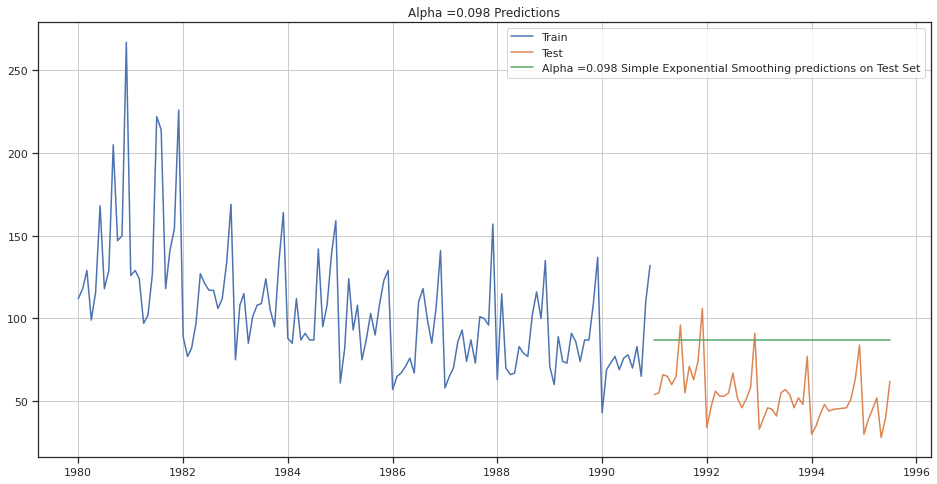

In [71]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(test_predictions_model2, label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.098 Predictions');

Setting different alpha values.
Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
We will run a loop with different alpha values to understand which particular value works best for alpha on the test set

#Model 6- Double Exponential Smoothing model 

Two parameters α and β are estimated in this model. Level and Trend are accounted for in this model

In [72]:
DES_train = train.copy()
DES_test = test.copy()

In [73]:
model_DES = Holt(SES_train['Rose'])

In [74]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

## Model 6 Auto Fit Parameters

In [75]:
model_DES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.157895,True
smoothing_slope,beta,0.157895,True
initial_level,l.0,112.000000,True
initial_slope,b.0,6.000000,True


In [76]:
test_predictions_model3 = model_DES_autofit.forecast(steps=len(test))
test_predictions_model3

1991-01-01     86.863579
1991-02-01     88.028056
1991-03-01     89.192534
1991-04-01     90.357011
1991-05-01     91.521488
1991-06-01     92.685966
1991-07-01     93.850443
1991-08-01     95.014921
1991-09-01     96.179398
1991-10-01     97.343876
1991-11-01     98.508353
1991-12-01     99.672831
1992-01-01    100.837308
1992-02-01    102.001785
1992-03-01    103.166263
1992-04-01    104.330740
1992-05-01    105.495218
1992-06-01    106.659695
1992-07-01    107.824173
1992-08-01    108.988650
1992-09-01    110.153127
1992-10-01    111.317605
1992-11-01    112.482082
1992-12-01    113.646560
1993-01-01    114.811037
1993-02-01    115.975515
1993-03-01    117.139992
1993-04-01    118.304469
1993-05-01    119.468947
1993-06-01    120.633424
1993-07-01    121.797902
1993-08-01    122.962379
1993-09-01    124.126857
1993-10-01    125.291334
1993-11-01    126.455811
1993-12-01    127.620289
1994-01-01    128.784766
1994-02-01    129.949244
1994-03-01    131.113721
1994-04-01    132.278199


In [77]:
## Test Data - RMSE

rmse_model3_test = metrics.mean_squared_error(test['Rose'],test_predictions_model3,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 70.572


In [78]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                              ,index=['Alpha=0.157,Beta=0.157:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
Alpha=0.098:SimpleExponentialSmoothing,36.796246
"Alpha=0.157,Beta=0.157:DoubleExponentialSmoothing",70.572452


# Model 7-Triple Exponential Smoothing model

Triple Exponential Smoothing (Holt - Winter's Model)

Three parameters α, β and γ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [79]:
TES_train = train.copy()
TES_test = test.copy()

In [80]:
model_TES = ExponentialSmoothing(SES_train['Rose'],trend='additive',seasonal='multiplicative')

In [81]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

## Model 7 Auto Fit Parameters

In [82]:
model_TES_autofit.params

{'damping_slope': nan,
 'initial_level': 76.65565186546128,
 'initial_seasons': array([1.47550231, 1.65927093, 1.80572588, 1.58888782, 1.77822665,
        1.92604314, 2.11649409, 2.25135146, 2.11690519, 2.08112772,
        2.40927212, 3.30448044]),
 'initial_slope': 0.0,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.10609635974778751,
 'smoothing_seasonal': 0.0,
 'smoothing_slope': 0.048438458440198374,
 'use_boxcox': False}

In [83]:
test_predictions_model4 = model_TES_autofit.forecast(steps=len(test))
test_predictions_model4

1991-01-01     56.674338
1991-02-01     63.471271
1991-03-01     68.788789
1991-04-01     60.277826
1991-05-01     67.180381
1991-06-01     72.461079
1991-07-01     79.292416
1991-08-01     83.989694
1991-09-01     78.640173
1991-10-01     76.982908
1991-11-01     88.741357
1991-12-01    121.193707
1992-01-01     53.882213
1992-02-01     60.331396
1992-03-01     65.371774
1992-04-01     57.271139
1992-05-01     63.815403
1992-06-01     68.816385
1992-07-01     75.287328
1992-08-01     79.729412
1992-09-01     74.634306
1992-10-01     73.044744
1992-11-01     84.182238
1992-12-01    114.940565
1993-01-01     51.090087
1993-02-01     57.191521
1993-03-01     61.954759
1993-04-01     54.264451
1993-05-01     60.450426
1993-06-01     65.171691
1993-07-01     71.282239
1993-08-01     75.469130
1993-09-01     70.628440
1993-10-01     69.106580
1993-11-01     79.623119
1993-12-01    108.687424
1994-01-01     48.297961
1994-02-01     54.051646
1994-03-01     58.537744
1994-04-01     51.257764


In [84]:
## Test Data - RMSE

rmse_model4_test = metrics.mean_squared_error(test['Rose'],test_predictions_model4,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 17.369


In [85]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model4_test]}
                              ,index=['Alpha=0.106,Beta=0.048,Gamma=0:TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
Alpha=0.098:SimpleExponentialSmoothing,36.796246
"Alpha=0.157,Beta=0.157:DoubleExponentialSmoothing",70.572452
"Alpha=0.106,Beta=0.048,Gamma=0:TripleExponentialSmoothing",17.369488


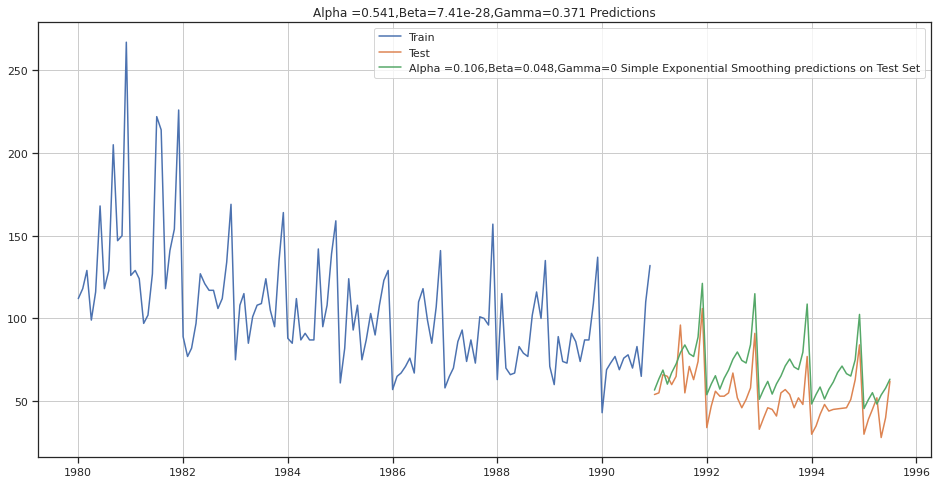

In [86]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(test_predictions_model4, label='Alpha =0.106,Beta=0.048,Gamma=0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.541,Beta=7.41e-28,Gamma=0.371 Predictions');

#Which exponential model performs best?
Tweak the different parameters for each of these models and try to come up with a better accuracy (less RMSE and MAPE)

Build a Simple Exponential Smoothing model by taking the best alpha [in the range of 0.3 to 1 taking an interval of 0.1] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [87]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Test RMSE


In [88]:
for i in np.arange(0.3,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model2_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    
    resultsDf_model = resultsDf_model.append({'Alpha Values':i
                                              ,'Test RMSE':rmse_model2_test_i}, ignore_index=True)

Model Evaluation

In [89]:
resultsDf_model

,Alpha Values,Test RMSE
0,0.3,47.504821
1,0.4,53.767406
2,0.5,59.641786
3,0.6,64.971288
4,0.7,69.698162
5,0.8,73.773992
6,0.9,77.139276


In [90]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Test RMSE
0,0.3,47.504821
1,0.4,53.767406
2,0.5,59.641786
3,0.6,64.971288
4,0.7,69.698162
5,0.8,73.773992
6,0.9,77.139276


In [91]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][1]]}
                              ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
Alpha=0.098:SimpleExponentialSmoothing,36.796246
"Alpha=0.157,Beta=0.157:DoubleExponentialSmoothing",70.572452
"Alpha=0.106,Beta=0.048,Gamma=0:TripleExponentialSmoothing",17.369488


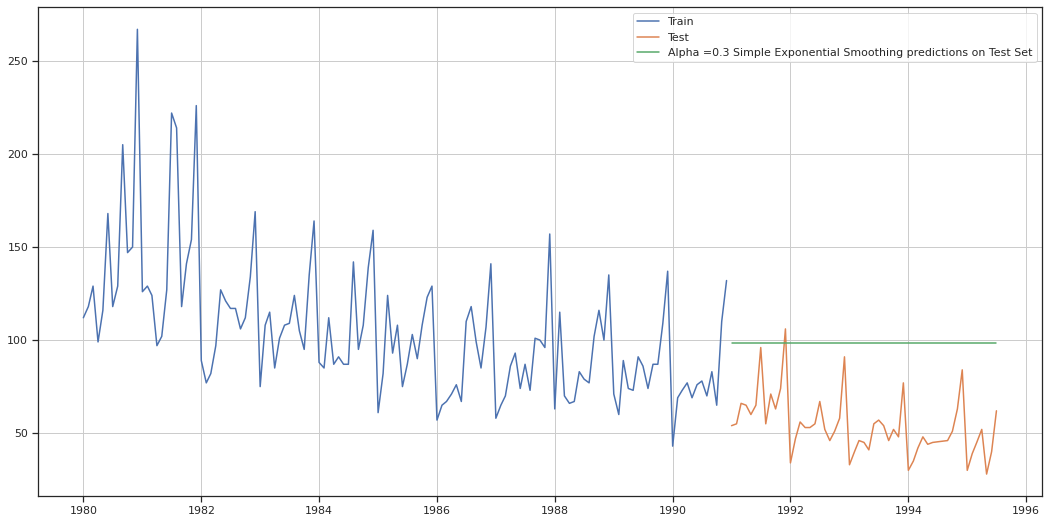

In [92]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

# plt.plot(SES_test['predict'], label='Alpha =2403 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

Build a Double Exponential Smoothing model by taking the best alpha and beta [both in the range of 0.3 to 1 taking an interval of 0.1] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [93]:
DES_train = train.copy()
DES_test = test.copy()

In [94]:
model_DES = Holt(DES_train['Rose'])

In [95]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Test RMSE


In [96]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        
        rmse_model4_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j
                                          ,'Test RMSE':rmse_model4_test}, ignore_index=True)

In [97]:
resultsDf_model

,Alpha Values,Beta Values,Test RMSE
0,0.3,0.3,265.567594
1,0.3,0.4,358.750942
2,0.3,0.5,451.810230
3,0.3,0.6,536.954148
4,0.3,0.7,601.616351
...,...,...,...
59,1.0,0.6,801.680218
60,1.0,0.7,841.892573
61,1.0,0.8,853.965537
62,1.0,0.9,834.710935


In [98]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Test RMSE
0,0.3,0.3,265.567594
8,0.4,0.3,339.306534
1,0.3,0.4,358.750942
16,0.5,0.3,394.272629
24,0.6,0.3,439.296033
...,...,...,...
46,0.8,0.9,1052.464792
38,0.7,0.9,1061.847942
47,0.8,1.0,1095.112285
31,0.6,1.0,1102.085828


In [99]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                              ,index=['Alpha=0.3 & Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
Alpha=0.098:SimpleExponentialSmoothing,36.796246
"Alpha=0.157,Beta=0.157:DoubleExponentialSmoothing",70.572452
"Alpha=0.106,Beta=0.048,Gamma=0:TripleExponentialSmoothing",17.369488


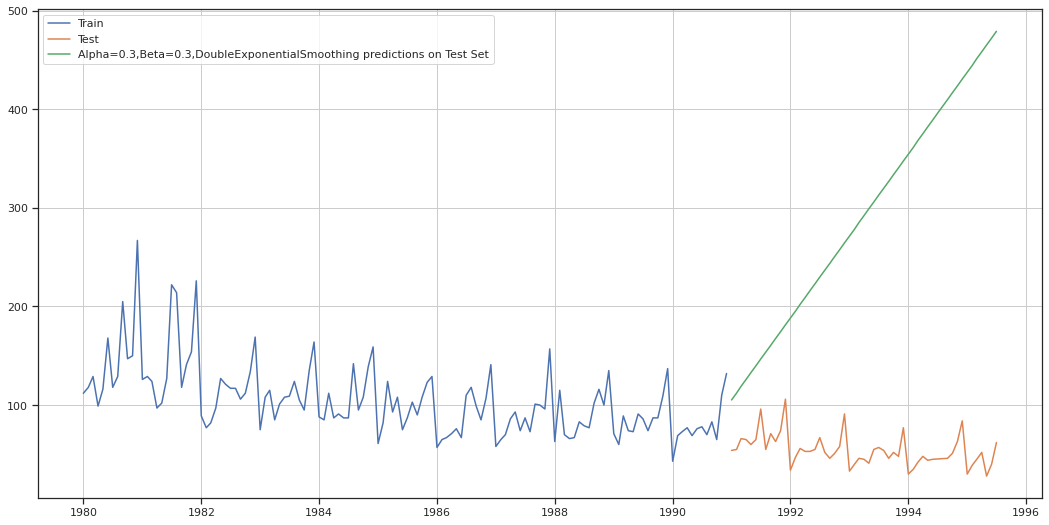

In [100]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')
plt.plot(DES_test['predict',0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

Build a Triple Exponential Smoothing model by taking the best alpha, beta and gamma [all in the range of 0.3 to 1 taking an interval of 0.1] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command

In [101]:
TES_train = train.copy()
TES_test = test.copy()

In [102]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE


In [103]:
for i in np.arange(0.3,1,0.1):
    for j in np.arange(0.3,1,0.1):
        for k in np.arange(0.3,1.,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
                
            rmse_model6_test_2 = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)
                    
            resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k
                                                  ,'Test RMSE':rmse_model6_test_2}, ignore_index=True)

In [104]:
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Test RMSE
0,0.3,0.3,0.3,19.057218
1,0.3,0.3,0.4,11.201633
2,0.3,0.3,0.5,30.565763
3,0.3,0.3,0.6,63.623019
4,0.3,0.3,0.7,122.472557
...,...,...,...,...
338,0.9,0.9,0.5,2222.920208
339,0.9,0.9,0.6,1785.358299
340,0.9,0.9,0.7,1636.325681
341,0.9,0.9,0.8,9579.668002


In [105]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Gamma Values,Test RMSE
7,0.3,0.4,0.3,1.094544e+01
1,0.3,0.3,0.4,1.120163e+01
54,0.4,0.3,0.8,1.261561e+01
14,0.3,0.5,0.3,1.441460e+01
101,0.5,0.3,0.6,1.672072e+01
...,...,...,...,...
314,0.9,0.5,0.9,2.368580e+05
333,0.9,0.8,0.7,2.438017e+05
86,0.4,0.8,0.5,3.194218e+05
185,0.6,0.8,0.6,6.620213e+05


In [106]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                              ,index=['Alpha=0.3,Beta=0.4,Gamma=0.3:TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
2pointTrailingMovingAverage,11.529278
4pointTrailingMovingAverage,14.451403
6pointTrailingMovingAverage,14.566327
9pointTrailingMovingAverage,14.727630
Alpha=0.098:SimpleExponentialSmoothing,36.796246
"Alpha=0.157,Beta=0.157:DoubleExponentialSmoothing",70.572452
"Alpha=0.106,Beta=0.048,Gamma=0:TripleExponentialSmoothing",17.369488


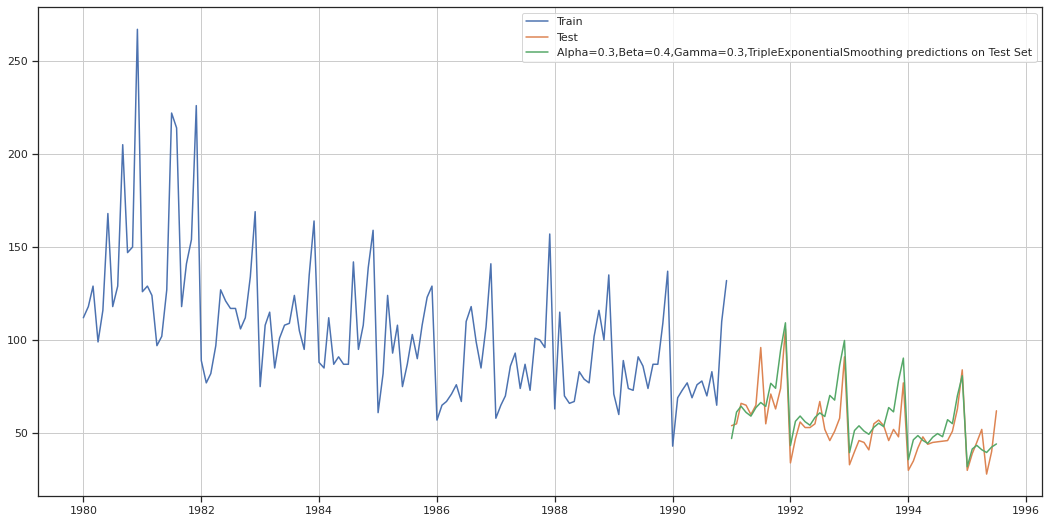

In [107]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.3,0.4, 0.3], label='Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In this particular we have built several models and went through a model building exercise. This particular exercise has given us an idea as to which particular model gives us the least error on our test set for this data. But in Time Series Forecasting, we need to be very vigil about the fact that after we have done this exercise we need to build the model on the whole data. Remember, the training data that we have used to build the model stops much before the data ends. In order to forecast using any of the models built, we need to build the models again (this time on the complete data) with the same parameters.

For this particular mentored learning session, we will go ahead and build only the top 2 models which gave us the best accuracy (least RMSE).

The models to be built on the whole data are the following:

Alpha=0.3,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing

In [108]:
fullmodel1 = ExponentialSmoothing(df_imputed,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.3,
                                                                 smoothing_slope=0.4,
                                                                 smoothing_seasonal=0.3)

In [109]:
RMSE_fullmodel1 = metrics.mean_squared_error(df_imputed['Rose'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 24.266535961104537


In [110]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=12)

Lets apply Brute Force Triple Exponential Smoothing on Full data .
The best found parameters for Triple Exponential Smoothing are Alpha=0.3,Beta=0.4,Gamma=0.3

## Plot for Best Next 12 month Forecast

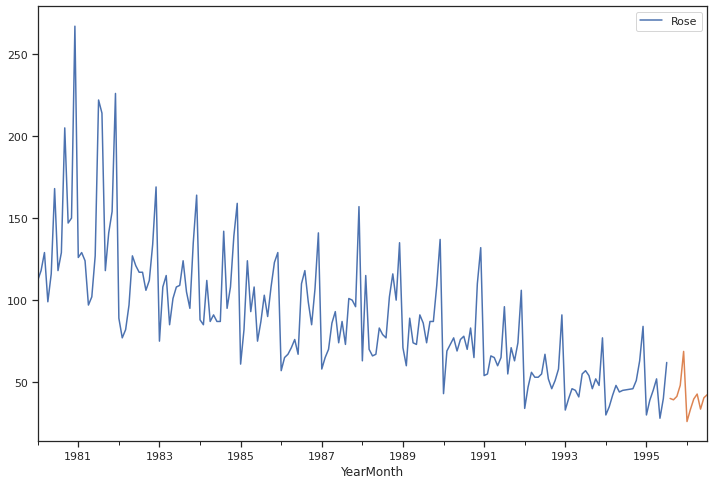

In [111]:
df_imputed.plot()
prediction_1.plot();

One assumption that we have made over here while calculating the confidence bands is that the standard deviation of the forecast distribution is almost equal to the residual standard deviation.

In [112]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,-7.559277,40.074648,87.708574
1995-09-01,-8.388196,39.245730,86.879656
1995-10-01,-6.321556,41.312369,88.946295
1995-11-01,0.433543,48.067469,95.701394
1995-12-01,21.101528,68.735454,116.369379


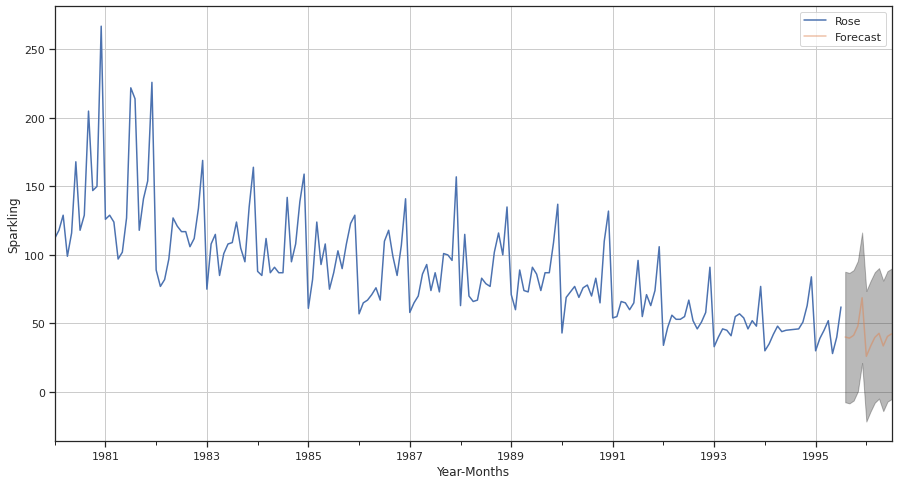

In [113]:
# plot the forecast along with the confidence band
axis = df_imputed.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.3)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid()
plt.show()

# ACF & PACF Plot

Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.Let us look at the ACF and the PACF plots once more.

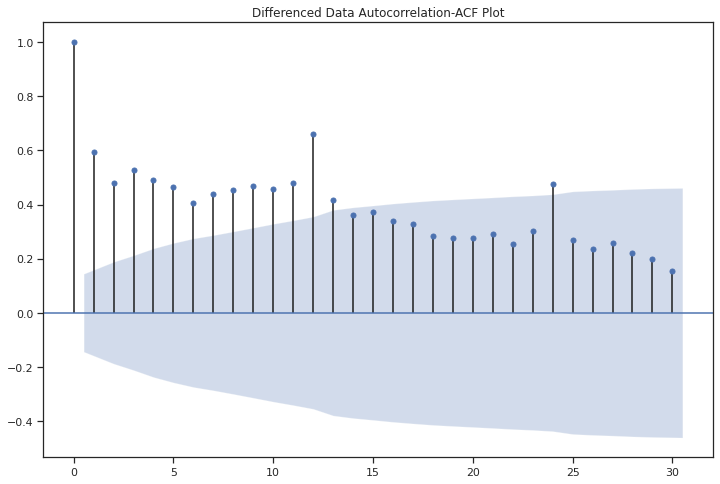

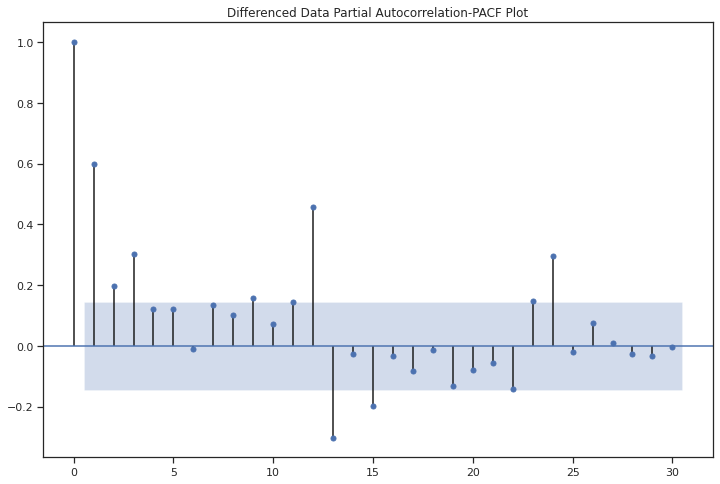

In [114]:
# ACF and Pacf plot on orginal time series
plot_acf(df['Rose'].dropna(),lags=30,title='Differenced Data Autocorrelation-ACF Plot')
plot_pacf(df['Rose'].dropna(),lags=30,title='Differenced Data Partial Autocorrelation-PACF Plot')
plt.show()

Seasonality is visible every 12 months in plots.

Since the original time series is non-stationary so we will do differencing using first order to get the sationary time series before building models.

##Check for stationarity of the whole Time Series data

Test for stationarity of the series for Sparkling Wines- Dicky Fuller test
H0: Series is non-stationary Ha: series is stationary

In [115]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

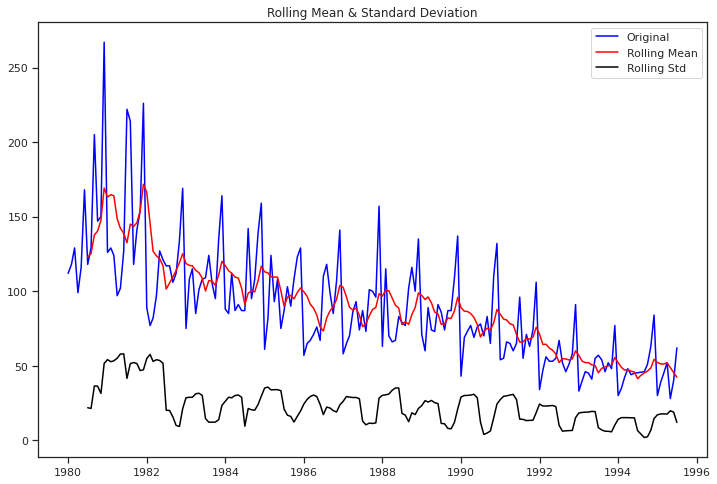

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [116]:
test_stationarity(df_imputed['Rose'])

Series is non-stationary with orginal data at alpha =0.05 as p -value is less than 0.05.
We see that at 5% significant level the Time Series is non-stationary.As the test statistics confirms that the p-value is not less than alpha level(0.05). It is confirmed that the test series for sparking wine is non stationary. Let us take a difference of order 1 and check whether the Time Series is stationary or not.

The plot shows that the rolling mean as well as the standard deviation is not constant, this gives us a hint of non-stationarity. Let us confirm it by using the Dicky Fuller Test.

The test shows that the test statistic is greater than the 1% value. This shows that we cannot reject the null hypothesis and the series is non-stationary.

#Lets try check for stationarity after taking first order differencing
Differencing method used to make the non-stationary time series of Sparkling wine to stationary

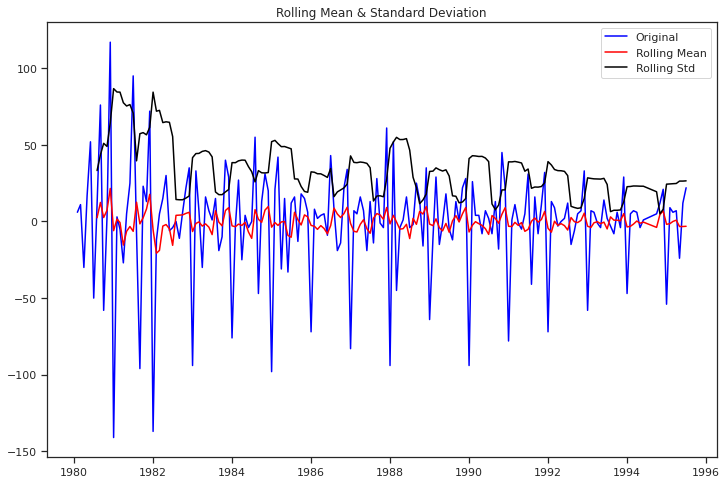

Results of Dickey-Fuller Test:
Test Statistic                -7.966534e+00
p-value                        2.855044e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.700000e+02
Critical Value (1%)           -3.469413e+00
Critical Value (5%)           -2.878696e+00
Critical Value (10%)          -2.575917e+00
dtype: float64 



In [117]:
test_stationarity(df['Rose'].diff().dropna())

Series is stationary post 1st order differencing at alpha =0.05 and p-value is less than 0.05.

Inference: We see that after taking a difference of order 1 the series have become stationary at 𝛼 = 0.05. Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms

The plot shows that the rolling mean as well as the standard deviation is now constant, this gives us a hint of stationarity. Let us confirm it by using the Dicky Fuller Test.

We can see that the time series is now stationary, as the test statistic is much less than the 1 percent critical value. This means that we are more than 99% confident that the time series is stationary.

Now that we have removed the stationarity from our time series, we can make the ACF(Auto-correlation function) and PACF(Partial Auto-correlation function) plots which will help us decide the parameters of our Arima model.

#Model 8 Auto -ARIMA Model(Using AIC )

Series is not sationary and hence differencing would be required.For an Auto -Arima ,we calculate the best p and q parameters by looking at the lowest Akaike Information Criterion(AIC )values.

In [118]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [119]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [120]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.726183046564
ARIMA(0, 1, 2) - AIC:1276.8353729386477
ARIMA(1, 1, 0) - AIC:1319.3483105801952
ARIMA(1, 1, 1) - AIC:1277.775748828637
ARIMA(1, 1, 2) - AIC:1277.359225420591
ARIMA(2, 1, 0) - AIC:1300.6092611744152
ARIMA(2, 1, 1) - AIC:1279.0456894093104
ARIMA(2, 1, 2) - AIC:1279.2986939365014


Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

In [121]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1276.835373
5,"(1, 1, 2)",1277.359225
4,"(1, 1, 1)",1277.775749
7,"(2, 1, 1)",1279.045689
8,"(2, 1, 2)",1279.298694
1,"(0, 1, 1)",1280.726183
6,"(2, 1, 0)",1300.609261
3,"(1, 1, 0)",1319.348311
0,"(0, 1, 0)",1335.152658


ARIMA (0,1,2) has a lowest AIC values

##Summary of  Auto-ARIMA (0,1,2)

In [122]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Mon, 04 Oct 2021   AIC                           1276.835
Time:                        10:20:30   BIC                           1288.336
Sample:                    02-01-1980   HQIC                          1281.509
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

Predict on the Test Set using this model and evaluate the model.

In [123]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [124]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.618093478883777


In [125]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2) Best AIC'])

resultsDf

,RMSE
"ARIMA(0,1,2) Best AIC",15.618093


##Model 8 - Auto ARIMA(0,1,2) using AIC plot

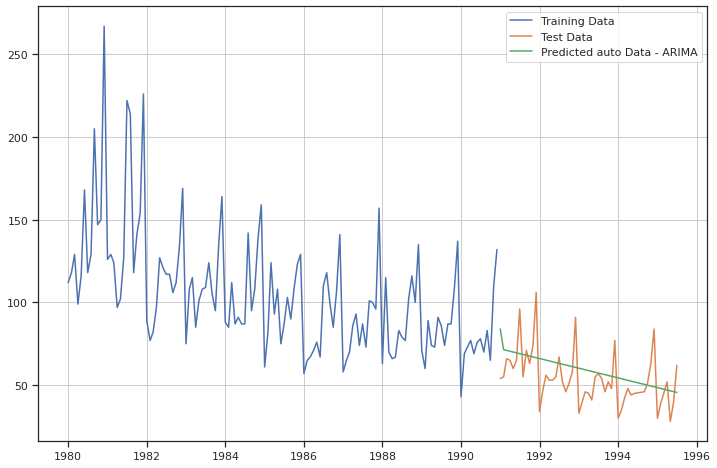

In [126]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_auto_ARIMA[0],label='Predicted auto Data - ARIMA')
plt.legend(loc='best')
plt.grid();
# Not really its not taking trend .So we will go for sarima model

#Model 10 Automated Sarima Model (Using AIC)

As the data has seasonality .Lets build the model with SARIMA.For an Auto-SARIMA ,the parameters pdq and PDQ are selected based on lowest Akaike Information Criterion (AIC)values 

Setting the seasonality as 12 for the first iteration of the auto SARIMA mode

In [127]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [128]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [129]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207316
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380891
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386745
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635752697
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697565
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.573540894588
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383962
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.555482591834
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383767
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918603
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330946817
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483306409
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535943
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461678
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988260811447
SARIMA(0, 1, 2)x(0, 0, 

Top 5 best AIC values for Auto -Sarima Model

In [130]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
53,"(1, 1, 2)","(2, 0, 2, 12)",889.900383
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


Lowest AIC value for SARIMA is (0,1,2)(2,0,2)12

#Summary of Sarimax(0,1,2)(2,0,2)12

In [131]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Mon, 04 Oct 2021   AIC                            887.938
Time:                                    10:21:24   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.890     -0.004      0.996    -373.020     371.334
ma.L2         -0.1573     29.833   

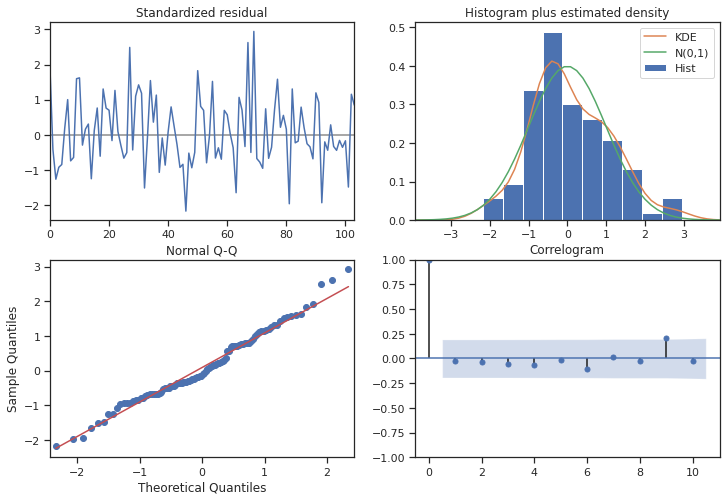

In [132]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Predict on the Test Set using auto_sarima 12 model and evaluate the model.

In [133]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [134]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867264,15.928501,31.647976,94.086552
1,70.541190,16.147659,38.892360,102.190020
2,77.356411,16.147656,45.707586,109.005236
3,76.208814,16.147656,44.559989,107.857639
4,72.747398,16.147656,41.098573,104.396223


In [135]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.928361908025416


In [136]:
temp_resultsDf_auto_SARIMA= pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12) Best AIC'])


resultsDf = pd.concat([resultsDf,temp_resultsDf_auto_SARIMA])

resultsDf

,RMSE
"ARIMA(0,1,2) Best AIC",15.618093
"SARIMA(0,1,2)(2,0,2,12) Best AIC",26.928362


#Model Plot for SARIMA (0,1,2)(2,0,2)12

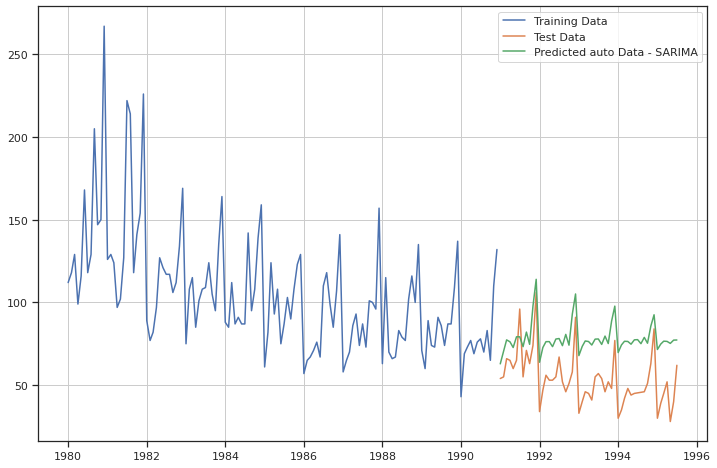

In [137]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_auto_SARIMA_12.predicted_mean,label='Predicted auto Data - SARIMA')
plt.legend(loc='best')
plt.grid();

Inference We need to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If it is not that it signifies that the model can be further improved and we repeat the process with the residuals.

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

The KDE plot of the residuals on the top right is almost similar with the normal distribution. The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed. The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

We see that the RMSE value have reduced further when the seasonality parameter was changed to 12.

#ACF & PACF Plots

First order differenced time series ACF and PACF Plot 

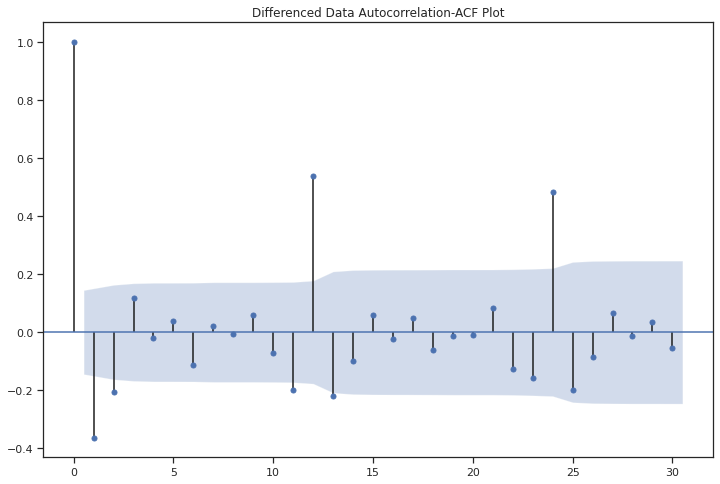

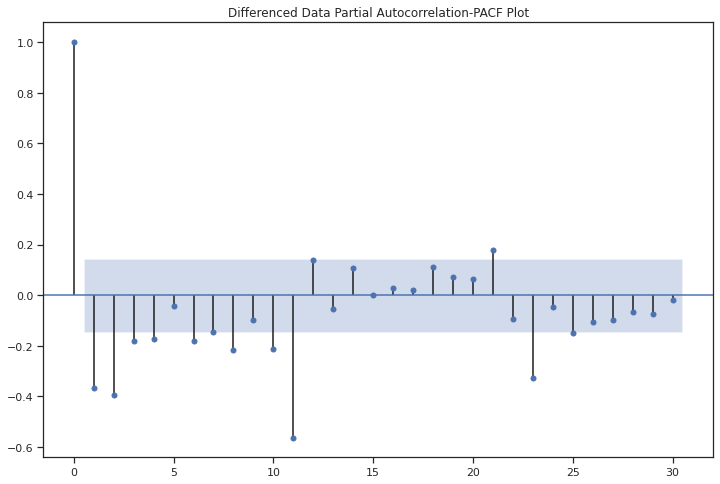

In [138]:
plot_acf(df['Rose'].diff(1).dropna(),lags=30,title='Differenced Data Autocorrelation-ACF Plot')
plot_pacf(df['Rose'].diff(1).dropna(),lags=30,title='Differenced Data Partial Autocorrelation-PACF Plot')
plt.show()

Seasonality after certain 12 lags that is every 12 months is viisble in plots 

Inference using the first order differenced time series Acf and Pacf plot we will calculate the values of p,d,q .
Here p =4(PACF plot)4 lag are falling outside the significance blue band range,d=1(order of differenceing is 1 as original series was non-stationary but became stationary after differencing) ,and q=3(ACF plot)-three lags are falling above the significance blue band range.
Seasonality after 12 lags is seen in plots .ACF & PACF plot are done using 95% confidence interval bands.

#Model 8-ARIMA Model by picking p,d,q values from ACF & PACF plots
Summary of ARIMA (4,1,3) Model

In [139]:
from statsmodels.tsa.arima_model import ARIMA

In [140]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(4,1,3))
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -633.476
Method:                       css-mle   S.D. of innovations             29.584
Date:                Mon, 04 Oct 2021   AIC                           1284.953
Time:                        10:21:26   BIC                           1310.829
Sample:                    02-01-1980   HQIC                          1295.468
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4922      0.078     -6.343      0.000      -0.644      -0.340
ar.L1.D.Rose    -0.4884      0.092     -5.293      0.000      -0.669      -0.308
ar.L2.D.Rose    -0.8867      0.100     -8.83

#Predict on the Test Set using Manual Arima model and evaluate the model

In [141]:
from sklearn.metrics import mean_squared_error

In [142]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [143]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

15.337607316381016


#ARIMA Model Evaluation-Using ACF & PACF Plots

In [144]:
temp_resultsDfARIMA1 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(4,1,3) Looking at ACF & PACF plot'])


resultsDf = pd.concat([resultsDf,temp_resultsDfARIMA1])

resultsDf

,RMSE
"ARIMA(0,1,2) Best AIC",15.618093
"SARIMA(0,1,2)(2,0,2,12) Best AIC",26.928362
"ARIMA(4,1,3) Looking at ACF & PACF plot",15.337607


#ARIMA Model Plot by picking p,d,q (4,1,3)using ACF & PACF Plots

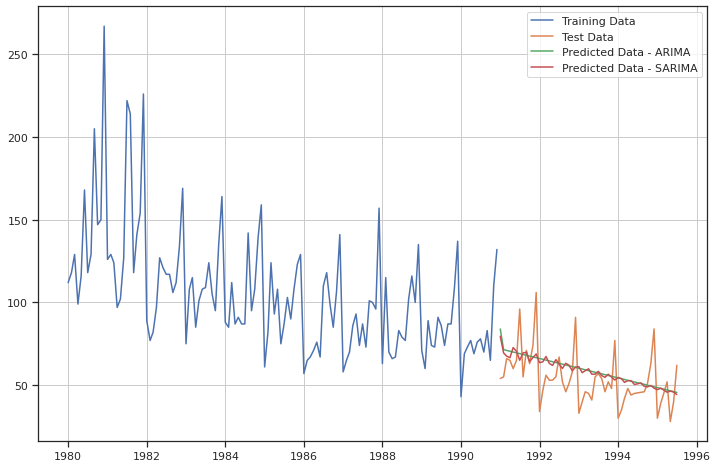

In [145]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_auto_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test.index,predicted_manual_ARIMA[0],label='Predicted Data - SARIMA')
# plt.plot(test_final.index,pred_SARIMAX.predicted_mean,label='Predicted Data - SARIMAX')
plt.legend(loc='best')
plt.grid();
# SARIMA is able to replicate the pattern of data 

#Model 10-Sarima model by picking p,d,q & P,D ,Q values from ACF and PACF plot

Here p=4,d=1,q=3(kept same as ARIMA Model using Acf and Pacf plot) 
P =3,D=0,Q=3
Seasonality =12
P=3,D=0 and Q=2

#Summary of SARIMA model(4,1,3)(3,0,2)12

In [146]:
import statsmodels.api as sm

SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 3),
                                seasonal_order=(3,0,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_12 = SARIMA_12.fit(maxiter=1000)
print(results_SARIMA_12.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 3)x(3, 0, 2, 12)   Log Likelihood                -373.493
Date:                            Mon, 04 Oct 2021   AIC                            772.986
Time:                                    10:21:35   BIC                            805.627
Sample:                                         0   HQIC                           786.155
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0969      0.156      0.622      0.534      -0.209       0.402
ar.L2         -0.8671      0.137   

#Model 11 Evaluation -SARIMA model by picking pdq and PDQ from ACF and PACF plots.

In [147]:
temp_results_Sarima_12 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA (4,1,3)(3,0,2)12 Looking at ACF & PACF Plots '] )


resultsDf = pd.concat([resultsDf,temp_results_Sarima_12])

resultsDf

,RMSE
"ARIMA(0,1,2) Best AIC",15.618093
"SARIMA(0,1,2)(2,0,2,12) Best AIC",26.928362
"ARIMA(4,1,3) Looking at ACF & PACF plot",15.337607
"SARIMA (4,1,3)(3,0,2)12 Looking at ACF & PACF Plots",15.337607


##Forecast Sparkling using Sarima Model on Whole data and forecast for coming 12 months.

Once we found the parameters that best fit to the data ,we are going to use these parameters to train of full Sparkling dataset and then forecast for 12 months in future.To fit a SARIMA model,we need to check for stationarity on whole data .

Stationarity Test on whole original dataset

The whole set is non-stationary at alpha =0.05 using Augmented Dickey Fuller Test.

Stationarity test post differencing of first order

The whole series is stationary at alpha =0.05 using Augmented Dickey Fuller test

#Forecast Rose Best fit ARIMA model
Best fit ARIMA model is using acf and pacf plot is (4,1,3)

##Summary of ARIMA(4,1,3) using ACF and PACF plot on full data

(Here p,d ,q value is take from best auto SARIMA model with least AIC p=4,q=3,d=1.

In [148]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(4,1,3),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                           Statespace Model Results                           
Dep. Variable:                   Rose   No. Observations:                  187
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -848.086
Date:                Mon, 04 Oct 2021   AIC                           1712.172
Time:                        10:21:35   BIC                           1737.804
Sample:                    01-01-1980   HQIC                          1722.563
                         - 07-01-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5715      0.107    -14.720      0.000      -1.781      -1.362
ar.L2         -0.6121      0.153     -4.002      0.000      -0.912      -0.312
ar.L3         -0.0255      0.163     -0.157      0.8

In [149]:
predicted_manual_ARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [150]:
predicted_manual_ARIMA_12_full_data.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,49.435809,27.225359,-3.924914,102.796532
1995-09-01,46.720483,29.075151,-10.265767,103.706733
1995-10-01,50.552024,29.134550,-6.550646,107.654693
1995-11-01,46.764781,29.736944,-11.518558,105.048120
1995-12-01,50.297178,29.767448,-8.045949,108.640305


In [151]:
rmse = mean_squared_error(df_imputed['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 29.468235646661174


In [152]:
temp_resultsDfSARIMA_Fulldata = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA_Fulldata(0,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDfSARIMA_Fulldata])

resultsDf

,RMSE
"ARIMA(0,1,2) Best AIC",15.618093
"SARIMA(0,1,2)(2,0,2,12) Best AIC",26.928362
"ARIMA(4,1,3) Looking at ACF & PACF plot",15.337607
"SARIMA (4,1,3)(3,0,2)12 Looking at ACF & PACF Plots",15.337607
"ARIMA_Fulldata(0,1,2)",29.468236


#95 and 99 Percent Cofidence Interval Table

In [153]:
pred_dynamic = results_full_data_model.get_prediction(start=pd.to_datetime('1980-01-01'), dynamic=True, full_results=True)

In [154]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [155]:
pred95 = results_full_data_model.get_forecast(steps=12, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [156]:
forecast_fullmodel_autosarima = pred95.predicted_mean

#Plot for the Best Next 12 month Forecast along with confidence interval

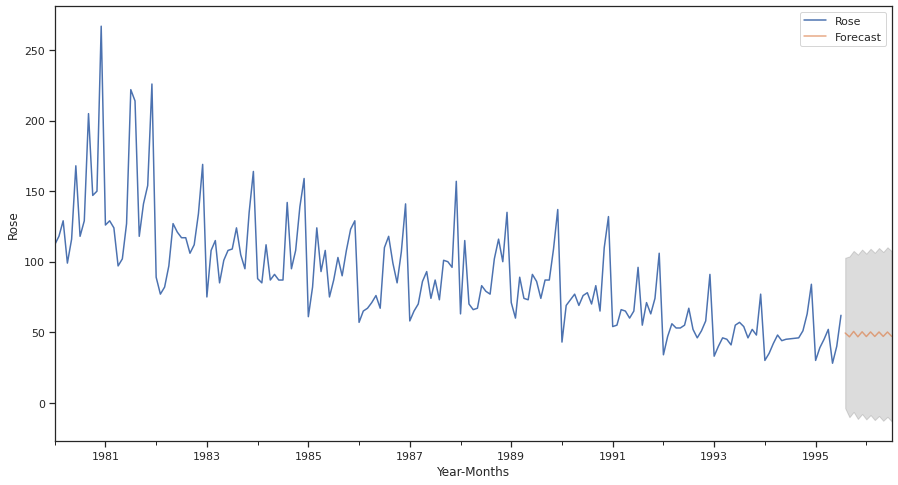

In [157]:
axis = df_imputed.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_autosarima.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(forecast_fullmodel_autosarima.index, pred_ci_95['lower Rose'], pred_ci_95['upper Rose'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

In [158]:
resultsDf

,RMSE
"ARIMA(0,1,2) Best AIC",15.618093
"SARIMA(0,1,2)(2,0,2,12) Best AIC",26.928362
"ARIMA(4,1,3) Looking at ACF & PACF plot",15.337607
"SARIMA (4,1,3)(3,0,2)12 Looking at ACF & PACF Plots",15.337607
"ARIMA_Fulldata(0,1,2)",29.468236


Arima Diagnostic Plot on Full data

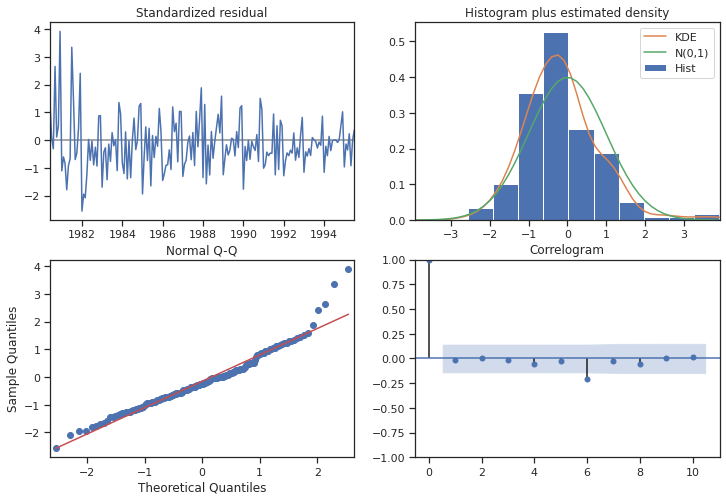

In [159]:
results_full_data_model.plot_diagnostics();

Inference 
We need to ensure that the residuals of our model are uncorrelated and normally distributed with zero mean .If it is not that it signifies that the model can further improved and we repeat the process with the residuals .
In this case,our model dignostic suggests that the model residuals are normally distributed based on the following :

1.The KDE plot of the residuals on top right is almost similar with the normal distribution.
2.The qq-plot on the bottom lefts shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0,1).Again ,this is a strong indication that the residuals are normally distributed .
3.The residuals over time (top left plot) dont display any obvious seasonality and appear to be white noise .This is confirmed by the autocorrelation (i,.e. correlogram ) plot on the bottom right ,which shows that the time series residuals have low correlation with lagged versions of itself .


Those observations coupled with the fact that there are no spikes outside the insignificant zone for both Acf and PACF plots lead us to conclude that residuals are random with no information or juice in them and our model produces a satisfactory fit that could help us understand our time series data and forecast future values .It seems that our ARIMA auto fit model and Triple Exponential model has perdformed well on this sparkling data .

## Inference 

Lowest AIC is obtained using ARIMA (0,1,2),it is expected as we are using simple method of ARIMA.Though the accuracy parameter are not satisfactory .
For Rose data ,best RMSE is observed by Brute Force Method on Triple Exponential Smoothing .
Best parameter for the same are alpha=0.3,beta=0.4 and gamma=0.3.
ARIMA model using acf and pacf plot is the second best and the model is ARIMA(4,1,3)
Conclusion :
For doing the best forecast on Rose dataset we will use Triple Exponential Smoothing .